In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
sb.set()
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
clvdata = pd.read_csv("CLVsummary.csv")
clvdata.drop(columns = clvdata.columns[0], inplace = True)
clvdata

,customer_unique_id,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,clv_profit
0,004288347e5e88a27ded2bb23747066c,1.0,171.0,397.0,87.900,0.042640,0.00,95.618031,0.448267,0.000000,0.044827
1,00a39521eb40f7012db50455bf083460,1.0,11.0,97.0,11.550,0.053582,0.01,19.144075,0.231999,0.191441,0.023200
2,011575986092c30523ecb71ff10cb473,1.0,60.0,192.0,63.900,0.047191,0.01,71.579066,0.572376,0.715791,0.057238
3,011b4adcd54683b480c4d841250a987f,1.0,177.0,371.0,227.880,0.048872,0.01,235.825290,1.326227,2.358253,0.132623
4,012452d40dafae4df401bced74cdb490,1.0,330.0,436.0,1320.000,0.082800,0.01,1329.718362,11.347272,13.297184,1.134727
...,...,...,...,...,...,...,...,...,...,...,...
2010,fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,310.0,369.850,0.407697,0.13,371.891459,46.676690,48.345890,4.667669
2011,fed519569d16e690df6f89cb99d4e682,1.0,88.0,251.0,89.900,0.043916,0.01,97.621278,0.628549,0.976213,0.062855
2012,ff03923ad1eb9e32304deb7f9b2a45c9,1.0,33.0,127.0,220.640,0.054838,0.01,228.573536,2.563879,2.285735,0.256388
2013,ff8892f7c26aa0446da53d01b18df463,1.0,186.0,461.0,99.900,0.037292,0.00,107.637513,0.397728,0.000000,0.039773


In [3]:
geodata = pd.read_csv("olist_geolocation_dataset.csv")
geodata.rename(columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"}, inplace = True)
geodata

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
customerdata = pd.read_csv("olist_customers_dataset.csv")
customerdata.drop(columns = 'customer_id', inplace = True)
customerdata

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
new = pd.merge(customerdata, clvdata, on='customer_unique_id')
new

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,clv_profit
0,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,1.0,31.0,348.0,246.62,0.016102,0.00,254.595715,0.492039,0.000000,0.049204
1,4c93744516667ad3b8f1fb645a3116a4,89253,jaragua do sul,SC,1.0,31.0,348.0,246.62,0.016102,0.00,254.595715,0.492039,0.000000,0.049204
2,295c05e81917928d76245e842748184d,5704,sao paulo,SP,1.0,91.0,174.0,220.98,0.068963,0.01,228.914088,2.808446,2.289141,0.280845
3,295c05e81917928d76245e842748184d,5704,sao paulo,SP,1.0,91.0,174.0,220.98,0.068963,0.01,228.914088,2.808446,2.289141,0.280845
4,e9dd12dca17352644a959d9dea133935,42800,camacari,BA,1.0,44.0,176.0,44.99,0.044398,0.01,52.638366,0.413468,0.526384,0.041347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,88fcb680dc8cd2e540010c0750b78242,13348,indaiatuba,SP,1.0,270.0,491.0,56.50,0.053132,0.01,64.167052,0.322859,0.641671,0.032286
4338,2dcbfb99d95c7ba6eb992a98627f45b8,4890,sao paulo,SP,1.0,5.0,273.0,85.99,0.016522,0.00,93.704930,0.216120,0.000000,0.021612
4339,2dcbfb99d95c7ba6eb992a98627f45b8,4890,sao paulo,SP,1.0,5.0,273.0,85.99,0.016522,0.00,93.704930,0.216120,0.000000,0.021612
4340,da29b8a3970adddb9ed2dc8a492065af,29027,vitoria,ES,1.0,90.0,434.0,19.90,0.020568,0.00,27.507632,0.058498,0.000000,0.005850


In [6]:
len(new.customer_unique_id.unique())

2015

In [7]:
new1 = new.drop_duplicates(subset=['customer_unique_id'])
new1 = new1.sort_values(by = 'customer_unique_id')
new1 = new1.reset_index()
new1 = new1.drop(columns = 'index')
new1

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,clv_profit
0,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ,1.0,171.0,397.0,87.900,0.042640,0.00,95.618031,0.448267,0.000000,0.044827
1,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,1.0,11.0,97.0,11.550,0.053582,0.01,19.144075,0.231999,0.191441,0.023200
2,011575986092c30523ecb71ff10cb473,30660,belo horizonte,MG,1.0,60.0,192.0,63.900,0.047191,0.01,71.579066,0.572376,0.715791,0.057238
3,011b4adcd54683b480c4d841250a987f,44200,santo amaro,BA,1.0,177.0,371.0,227.880,0.048872,0.01,235.825290,1.326227,2.358253,0.132623
4,012452d40dafae4df401bced74cdb490,3220,sao paulo,SP,1.0,330.0,436.0,1320.000,0.082800,0.01,1329.718362,11.347272,13.297184,1.134727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,fe81bb32c243a86b2f86fbf053fe6140,1453,sao paulo,SP,4.0,242.0,310.0,369.850,0.407697,0.13,371.891459,46.676690,48.345890,4.667669
2011,fed519569d16e690df6f89cb99d4e682,20540,rio de janeiro,RJ,1.0,88.0,251.0,89.900,0.043916,0.01,97.621278,0.628549,0.976213,0.062855
2012,ff03923ad1eb9e32304deb7f9b2a45c9,18703,avare,SP,1.0,33.0,127.0,220.640,0.054838,0.01,228.573536,2.563879,2.285735,0.256388
2013,ff8892f7c26aa0446da53d01b18df463,45972,ibiraja,BA,1.0,186.0,461.0,99.900,0.037292,0.00,107.637513,0.397728,0.000000,0.039773


In [8]:
new2 = new1[['customer_unique_id','customer_zip_code_prefix','customer_city','customer_state','predicted_clv']]
new2

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,predicted_clv
0,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ,0.448267
1,00a39521eb40f7012db50455bf083460,72595,brasilia,DF,0.231999
2,011575986092c30523ecb71ff10cb473,30660,belo horizonte,MG,0.572376
3,011b4adcd54683b480c4d841250a987f,44200,santo amaro,BA,1.326227
4,012452d40dafae4df401bced74cdb490,3220,sao paulo,SP,11.347272
...,...,...,...,...,...
2010,fe81bb32c243a86b2f86fbf053fe6140,1453,sao paulo,SP,46.676690
2011,fed519569d16e690df6f89cb99d4e682,20540,rio de janeiro,RJ,0.628549
2012,ff03923ad1eb9e32304deb7f9b2a45c9,18703,avare,SP,2.563879
2013,ff8892f7c26aa0446da53d01b18df463,45972,ibiraja,BA,0.397728


In [9]:
new3 = pd.merge(geodata, new2, on='customer_zip_code_prefix')
new3

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_unique_id,customer_city,customer_state,predicted_clv
0,1046,-23.546081,-46.644820,sao paulo,SP,6f8e7d40046694539c87b98cb5096a28,sao paulo,SP,0.404963
1,1046,-23.546129,-46.642951,sao paulo,SP,6f8e7d40046694539c87b98cb5096a28,sao paulo,SP,0.404963
2,1046,-23.546081,-46.644820,sao paulo,SP,6f8e7d40046694539c87b98cb5096a28,sao paulo,SP,0.404963
3,1046,-23.545884,-46.643163,sao paulo,SP,6f8e7d40046694539c87b98cb5096a28,sao paulo,SP,0.404963
4,1046,-23.545166,-46.643786,sao paulo,SP,6f8e7d40046694539c87b98cb5096a28,sao paulo,SP,0.404963
...,...,...,...,...,...,...,...,...,...
324067,99750,-27.394038,-52.568970,erval grande,RS,124ef8d5acc80858c69d34e3e08b572d,erval grande,RS,4.489285
324068,99750,-27.394458,-52.570787,erval grande,RS,124ef8d5acc80858c69d34e3e08b572d,erval grande,RS,4.489285
324069,99750,-27.394458,-52.570787,erval grande,RS,124ef8d5acc80858c69d34e3e08b572d,erval grande,RS,4.489285
324070,99750,-27.396426,-52.567746,erval grande,RS,124ef8d5acc80858c69d34e3e08b572d,erval grande,RS,4.489285


# Many duplicates as we are unable to derive customer's exact address. So we will just drop all the duplicates as the exact locations of each duplicate is quite near each other.

In [10]:
new4 = new3.drop_duplicates(subset=['customer_unique_id'])
new4 = new4.sort_values(by = 'customer_unique_id')
new4 = new4.reset_index()
new4 = new4.drop(columns = 'index')
new4

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_unique_id,customer_city,customer_state,predicted_clv
0,26220,-22.758886,-43.435672,nova iguacu,RJ,004288347e5e88a27ded2bb23747066c,nova iguacu,RJ,0.448267
1,30660,-19.983999,-44.032573,belo horizonte,MG,011575986092c30523ecb71ff10cb473,belo horizonte,MG,0.572376
2,44200,-12.548775,-38.712588,santo amaro,BA,011b4adcd54683b480c4d841250a987f,santo amaro,BA,1.326227
3,3220,-23.590818,-46.551266,sao paulo,SP,012452d40dafae4df401bced74cdb490,sao paulo,SP,11.347272
4,6550,-23.414784,-46.974449,pirapora do bom jesus,SP,012a218df8995d3ec3bb221828360c86,pirapora do bom jesus,SP,19.711841
...,...,...,...,...,...,...,...,...,...
2003,1453,-23.583436,-46.686463,sao paulo,SP,fe81bb32c243a86b2f86fbf053fe6140,sao paulo,SP,46.676690
2004,20540,-22.921733,-43.258689,rio de janeiro,RJ,fed519569d16e690df6f89cb99d4e682,rio de janeiro,RJ,0.628549
2005,18703,-23.122708,-48.921441,avare,SP,ff03923ad1eb9e32304deb7f9b2a45c9,avare,SP,2.563879
2006,45972,-17.197929,-40.220196,ibirajá,BA,ff8892f7c26aa0446da53d01b18df463,ibiraja,BA,0.397728


# Loss of 7 entries from 2015 in new2 to 2008 in new4

### Why?

In [11]:
miss = list(set(new2['customer_unique_id'])-set(new4['customer_unique_id']))
new2.loc[new2['customer_unique_id'] == miss[0]]

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,predicted_clv
1027,827b19392982299876c0aca1f92208c2,29949,sao mateus,ES,0.448788


In [12]:
geodata.loc[geodata['customer_zip_code_prefix'] == 72465]

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


## The zipcodes do not exist in the geodata csv, so we will just ignore these entries


# Now we have the locations of each customer as well as their corresponding CLV. 

# We can now find out which regions in Brazil generate more profit for Olist, so that Olist's marketing and sales team can concentrate on those areas

In [13]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
from datashader.mpl_ext import dsshow, alpha_colormap
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib

In [14]:
geometry = [Point(xy) for xy in zip(new4.geolocation_lng, new4.geolocation_lat)]

In [15]:
new4['geometry'] = geometry

In [16]:
crs = {'init': 'epsg:4326'}
customer_locs = gpd.GeoDataFrame(new4, crs=crs, geometry=geometry)

In [17]:
customer_locs[['geometry','geolocation_lat','geolocation_lng']].head(10)

,geometry,geolocation_lat,geolocation_lng
0,POINT (-43.43567 -22.75889),-22.758886,-43.435672
1,POINT (-44.03257 -19.98400),-19.983999,-44.032573
2,POINT (-38.71259 -12.54877),-12.548775,-38.712588
3,POINT (-46.55127 -23.59082),-23.590818,-46.551266
4,POINT (-46.97445 -23.41478),-23.414784,-46.974449
5,POINT (-47.02178 -22.88930),-22.889297,-47.021782
6,POINT (-38.93683 -12.23756),-12.237565,-38.936826
7,POINT (-46.79561 -21.97841),-21.978415,-46.795615
8,POINT (-49.21919 -21.46284),-21.462843,-49.219188
9,POINT (-46.65861 -23.54379),-23.543787,-46.658612


In [18]:
brazilmap = gpd.read_file("./Brazil/bra_admbnda_adm1_ibge_2020.shp")


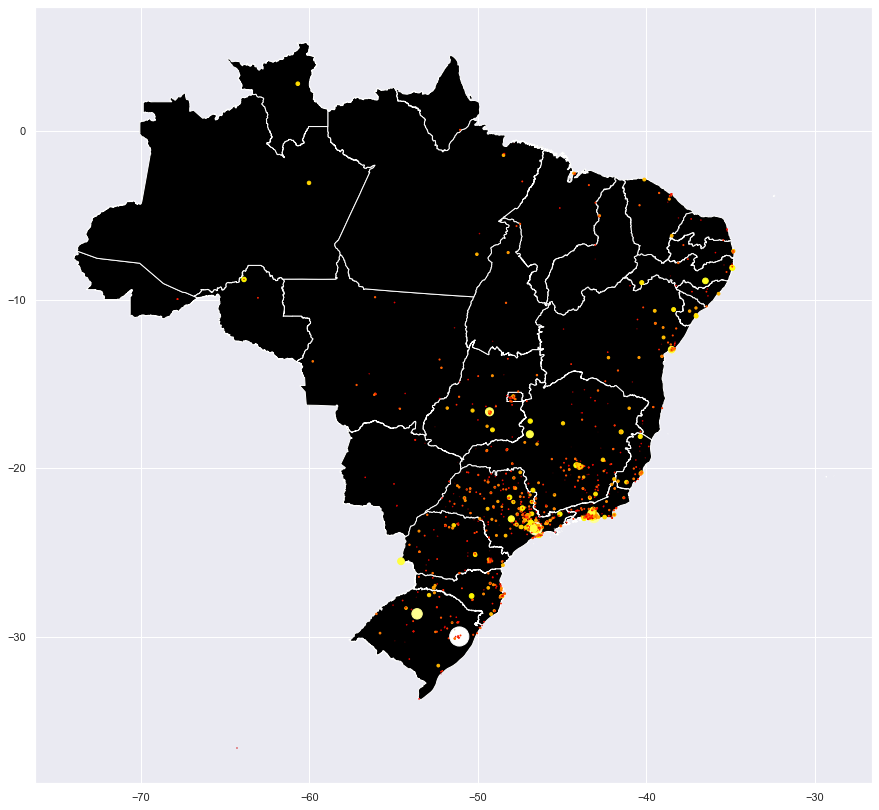

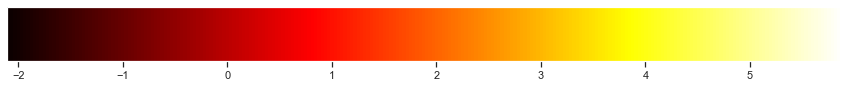

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
norm = matplotlib.colors.Normalize(vmin=math.log(customer_locs['predicted_clv'].min(),10), vmax=math.log(customer_locs['predicted_clv'].max()))
brazilmap.plot(ax=ax, facecolor = 'black')
plt.scatter(customer_locs['geolocation_lng'], 
            customer_locs['geolocation_lat'],
            customer_locs['predicted_clv'],
             norm=matplotlib.colors.LogNorm(vmin=customer_locs['predicted_clv'].min(), vmax=customer_locs['predicted_clv'].max()),
            cmap='hot', c = customer_locs['predicted_clv'],
            marker = 'o', alpha=1)
fig, ax = plt.subplots(figsize = (15,1))
cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=matplotlib.cm.hot, norm = norm,
                                orientation='horizontal')

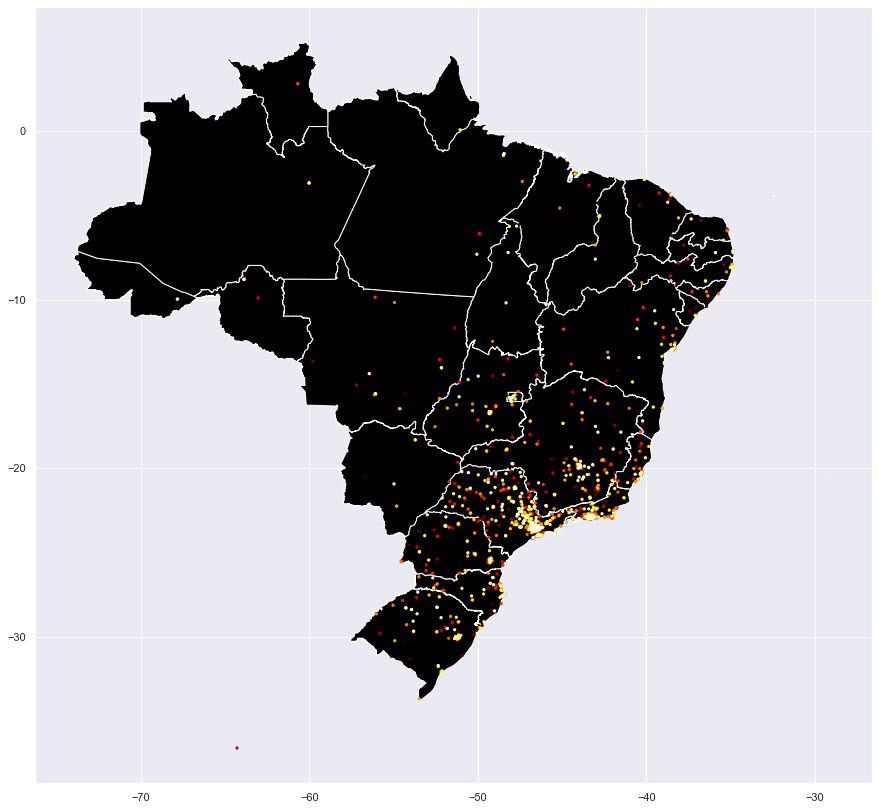

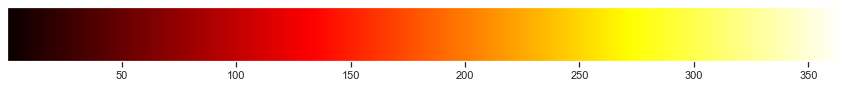

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
norm = matplotlib.colors.Normalize(vmin=customer_locs['predicted_clv'].min(), vmax=customer_locs['predicted_clv'].max())
brazilmap.plot(ax=ax, facecolor = 'black')
customer_locs.geometry.plot(marker='o',
                            c = customer_locs['predicted_clv'],
                            cmap = 'hot', 
                            markersize=5, 
                            ax=ax)
fig, ax = plt.subplots(figsize = (15,1))
cb1 = matplotlib.colorbar.ColorbarBase(ax, cmap=matplotlib.cm.hot, norm = norm,
                                orientation='horizontal')